In [157]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%config Completer.use_jedi = False

In [281]:
root = '/Users/haberkernh/Dropbox (HHMI)/2DstimSelection/blender4skybox/'
folder = 'unity-skybox-16h-el48_52-az250_65/'#'unity-skybox-19h-el14_05-az281_37/'#'unity-skybox-13h-el68_25-az169_56/'# 

path = root + folder
savename = '16h'

arrB = np.zeros((gradB_F.size[0],gradB_F.size[1],4))
arrG = np.zeros((gradB_F.size[0],gradB_F.size[1],4))
arrR = np.zeros((gradB_F.size[0],gradB_F.size[1],4))

In [282]:
gradB_F = Image.open(path + 'SkyBox_Front_blue.tif')
gradG_F = Image.open(path + 'SkyBox_Front_green.tif')
gradR_F = Image.open(path + 'SkyBox_Front_red.tif')
arrB[:,:,2] = np.array(gradB_F)
arrG[:,:,2] = np.array(gradG_F)
arrR[:,:,2] = np.array(gradR_F)

gradB_L = Image.open(path + 'SkyBox_Left_blue.tif')
gradG_L = Image.open(path + 'SkyBox_Left_green.tif')
gradR_L = Image.open(path + 'SkyBox_Left_red.tif')
arrB[:,:,3] = np.array(gradB_L)
arrG[:,:,3] = np.array(gradG_L)
arrR[:,:,3] = np.array(gradR_L)

gradB_B = Image.open(path + 'SkyBox_Back_blue.tif')
gradG_B = Image.open(path + 'SkyBox_Back_green.tif')
gradR_B = Image.open(path + 'SkyBox_Back_red.tif')
arrB[:,:,0] = np.array(gradB_B)
arrG[:,:,0] = np.array(gradG_B)
arrR[:,:,0] = np.array(gradR_B)

gradB_R = Image.open(path + 'SkyBox_Right_blue.tif')
gradG_R = Image.open(path + 'SkyBox_Right_green.tif')
gradR_R = Image.open(path + 'SkyBox_Right_red.tif')
arrB[:,:,1] = np.array(gradB_R)
arrG[:,:,1] = np.array(gradG_R)
arrR[:,:,1] = np.array(gradR_R)


In [283]:
BGvalue = arrB.astype(int) + arrG.astype(int)
BGvalue = (BGvalue/2).astype(int)

In [284]:
horizon = int(gradB_F.size[1]/2)
vminval= 180

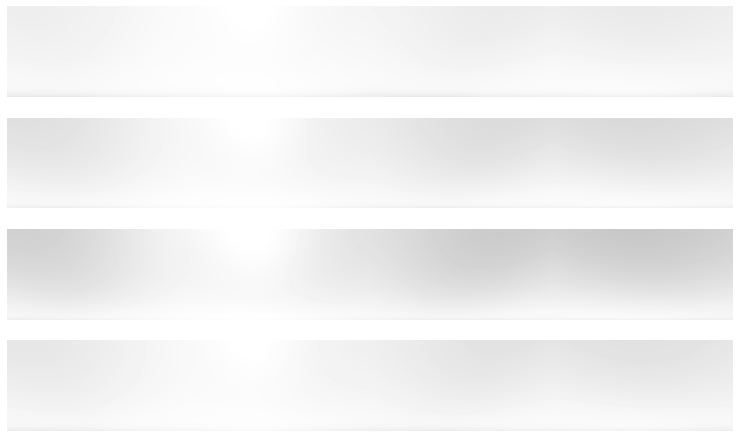

In [285]:
fig, axs = plt.subplots(4,4, figsize=(13,8))
for i in range(4):
    axs[0,i].imshow(arrB[:horizon,:,i], vmin=0,vmax=254, cmap='gray')
    axs[1,i].imshow(arrG[:horizon,:,i], vmin=0,vmax=254, cmap='gray')
    axs[2,i].imshow(arrR[:horizon,:,i], vmin=0,vmax=254, cmap='gray')
    
    axs[3,i].imshow(BGvalue[:horizon,:,i], vmin=0,vmax=254, cmap='gray')

    for ax in axs[:,i]:
        ax.set_axis_off()
        ax.set_aspect('equal')
plt.subplots_adjust(wspace=0, hspace=0.1)
fig.savefig('gradientComparison_grey_{}.pdf'.format(savename))

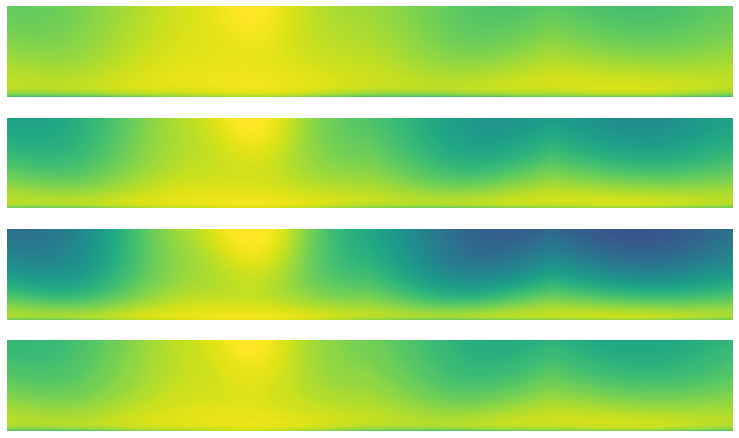

In [286]:
fig, axs = plt.subplots(4,4, figsize=(13,8))
for i in range(4):
    axs[0,i].imshow(arrB[:horizon,:,i], vmin=vminval,vmax=254)
    axs[1,i].imshow(arrG[:horizon,:,i], vmin=vminval,vmax=254)
    axs[2,i].imshow(arrR[:horizon,:,i], vmin=vminval,vmax=254)
    
    axs[3,i].imshow(BGvalue[:horizon,:,i], vmin=vminval,vmax=254)

    for ax in axs[:,i]:
        ax.set_axis_off()
        ax.set_aspect('equal')
plt.subplots_adjust(wspace=0, hspace=0.1)
fig.savefig('gradientComparison_{}.pdf'.format(savename))

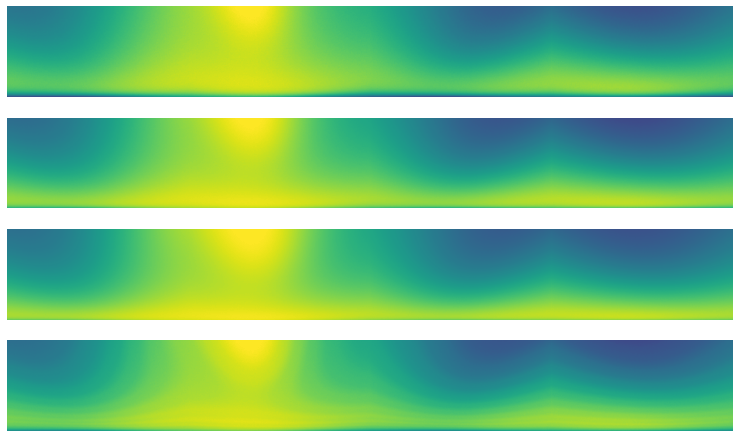

In [287]:
fig, axs = plt.subplots(4,4, figsize=(13,8))
for i in range(4):
    axs[0,i].imshow(arrB[:horizon,:,i], vmin=vminval+45,vmax=254)
    axs[1,i].imshow(arrG[:horizon,:,i], vmin=vminval+25,vmax=254)
    axs[2,i].imshow(arrR[:horizon,:,i], vmin=vminval,vmax=254)
    
    axs[3,i].imshow(BGvalue[:horizon,:,i], vmin=vminval+35,vmax=254)

    for ax in axs[:,i]:
        ax.set_axis_off()
        ax.set_aspect('equal')
plt.subplots_adjust(wspace=0, hspace=0.1)

fig.savefig('gradientComparison_norm_{}.pdf'.format(savename))

<ipython-input-144-9e9d53774ba7>:1: RuntimeWarning: invalid value encountered in true_divide
  BGcontrast = (arrB.astype(int) - arrG.astype(int) ) / (arrB.astype(int) + arrG.astype(int))


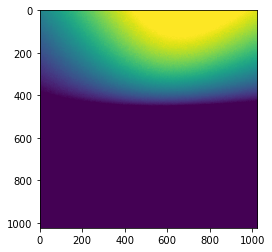

In [144]:
BGcontrast = (arrB.astype(int) - arrG.astype(int) ) / (arrB.astype(int) + arrG.astype(int))
BGcontrast[np.isnan(BGcontrast)] = 0
BGcontrast[~np.isfinite(BGcontrast)] = 0
plt.imshow(BGcontrast, vmin=0,vmax=0.03)

<ipython-input-141-c9bcc67f017b>:1: RuntimeWarning: invalid value encountered in true_divide
  BGcontrast = (arrR.astype(int) - arrB.astype(int) ) / (arrR.astype(int) + arrB.astype(int))


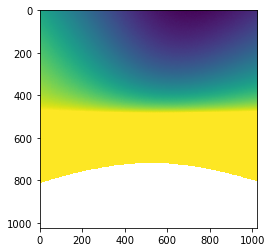

In [141]:
BGcontrast = (arrR.astype(int) - arrB.astype(int) ) / (arrR.astype(int) + arrB.astype(int))
#BGcontrast[np.isnan(BGcontrast)] = 0
#BGcontrast[~np.isfinite(BGcontrast)] = 0

plt.imshow(BGcontrast, vmin=-0.08,vmax=0.01)

In [143]:
np.nanmax(BGcontrast)

0.03464203233256351

In [110]:
BGcontrast.shape

(1024, 1024)